# Cirq

In [10]:
import cirq
from cirq.contrib.svg import SVGCircuit

def get_cirq_compilation(qasm_qc, target):
    if "ibm" in target:
        pass
    elif "rigetti" in target:
        pass
    elif "ionq" in target:
        pass

In [13]:
from cirq.contrib.qasm_import import circuit_from_qasm
test = open('../MQTbench/mqt/bench/qasm_output/su2random_indep_4.qasm', 'r').read()
ion_circuit = cirq.ion.ConvertToIonGates().convert_circuit(circuit)
print(ion_circuit)

FileNotFoundError: [Errno 2] No such file or directory: '../MQTbench/mqt/bench/qasm_output/su2random_indep_4.qasm'

In [ ]:
import cirq_rigetti
c = cirq_rigetti.circuit_transformers.default(circuit=circuit)
print(c)

SVGCircuit(c[0])

In [ ]:
import cirq
import cirq_ionq as ionq
q0 = cirq.LineQubit(0)
device = ionq.IonQAPIDevice([q0])
circuit = cirq.Circuit(device=device)
circuit.append(cirq.H(q0)**0.2) # Non-IonQ-API gate
print(circuit) # will print the circuit converted into IonQ's target gateset

# Pennylane

In [ ]:
import pennylane as qml
from pennylane import numpy as np

In [ ]:
ibm_native_gates = FakeMontreal().configuration().basis_gates
rigetti_native_gates = ["rx", "rz", "cz"]
ibm_native_gates

dev = qml.device('default.qubit', wires=[0, 1, 2])
qnode = qml.QNode(qfunc, dev)
print(qml.draw(qnode)(0.2, 0.3, 0.4))

compiled_qfunc = qml.compile(basis_set=rigetti_native_gates)(qfunc)
compiled_qnode = qml.QNode(compiled_qfunc, dev)
print(qml.draw(compiled_qnode)(0.2, 0.3, 0.4))

In [ ]:
path_file = "../MQTbench/qasm_output/dj_indep_4.qasm"
with open (path_file, "r") as myfile:
    data = myfile.read()
my_circuit = qml.from_qasm(data)

n=4
dev = qml.device('default.qubit', wires=n)
@qml.qnode(dev)
def circuit():
    my_circuit(wires=tuple(range(n)))
    return [qml.expval(qml.PauliZ(i)) for i in range(n)]

#circuit()
#print(dev._circuit.qasm(formatted=True))

In [ ]:
pennylane_ibm=["RZ", "SX", "PauliX", "CNOT"]
pennylane_rigetti=["RX", "RZ", "CZ"]

In [ ]:
compiled_qfunc1 = qml.compile()(circuit)
compiled_qnode1 = qml.QNode(compiled_qfunc1, dev)
print(qml.draw(compiled_qnode1)())

compiled_qfunc2 = qml.compile(
    basis_set=["CNOT", "RX", "RY", "RZ"],
    num_passes=2
)(circuit)

compiled_qnode2 = qml.QNode(compiled_qfunc2, dev)
print(qml.draw(compiled_qnode2)())

In [ ]:
def qfunc(x, y, z):
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    qml.RZ(z, wires=2)
    qml.CNOT(wires=[2, 1])
    qml.RX(z, wires=0)
    qml.CNOT(wires=[1, 0])
    qml.RX(x, wires=0)
    qml.CNOT(wires=[1, 0])
    qml.RZ(-z, wires=2)
    qml.RX(y, wires=2)
    qml.PauliY(wires=2)
    qml.CY(wires=[1, 2])
    return qml.expval(qml.PauliZ(wires=0))

dev = qml.device('default.qubit', wires=[0, 1, 2])
qnode = qml.QNode(qfunc, dev)
print(qml.draw(qnode)(0.2, 0.3, 0.4))

compiled_qfunc = qml.compile(
    pipeline=[
        qml.transforms.commute_controlled(direction="left"),
        qml.transforms.merge_rotations(atol=1e-6),
        qml.transforms.cancel_inverses
    ],
    basis_set=["CNOT", "RX", "RY", "CZ"],
    num_passes=2
)(qfunc)

compiled_qnode = qml.QNode(compiled_qfunc, dev)
print(qml.draw(compiled_qnode)(0.2, 0.3, 0.4))

In [ ]:
def qfunc():
    qml.Hadamard(wires=0)    
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    qml.RZ(-0.4, wires=2)
    qml.CNOT(wires=[2, 1])
    qml.RX(-0.4, wires=0)
    qml.CNOT(wires=[1, 0])
    qml.RX(-0.4, wires=0)
    qml.CNOT(wires=[1, 0])
    qml.RZ(-0.4, wires=2)
    qml.RX(1, wires=2)
    qml.PauliY(wires=2)
    qml.CY(wires=[1, 2])
    return [qml.expval(qml.PauliZ(i)) for i in range(2)]

dev = qml.device('default.qubit', wires=[0, 1, 2])
qnode = qml.QNode(qfunc, dev)
print(qml.draw(qnode)())

compiled_qfunc = qml.compile(
    basis_set=["CNOT", "Rdawd", "wdfawdaw", "dawd"],
    num_passes=20
)(qfunc)

compiled_qnode = qml.QNode(compiled_qfunc, dev)
print(qml.draw(compiled_qnode)())

# Machine Learning Model

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [22]:
model.evaluate(x_test,  y_test, verbose=2)

2022-03-24 15:32:09.189384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.0699 - accuracy: 0.9782 - 1s/epoch - 4ms/step


[0.06987350434064865, 0.9782000184059143]

In [23]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [24]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.61644095e-07, 1.43269858e-07, 4.41609700e-06, 1.33631716e-03,
        3.49819218e-09, 3.56963005e-06, 8.81849760e-10, 9.98581648e-01,
        1.75721379e-05, 5.61770830e-05],
       [5.36965814e-08, 4.86371660e-04, 9.99352634e-01, 1.58076102e-04,
        4.83236368e-12, 2.66078274e-07, 4.82783491e-07, 1.39725427e-12,
        2.11429119e-06, 3.06094768e-11],
       [1.43877037e-06, 9.99599755e-01, 7.32547123e-05, 2.63284965e-05,
        3.59330115e-05, 7.65023287e-06, 3.27832531e-05, 1.42501056e-04,
        7.94223160e-05, 9.00848477e-07],
       [9.99954581e-01, 1.00921858e-08, 1.31901525e-05, 3.07816386e-08,
        1.21074237e-07, 1.11040379e-06, 2.26913235e-05, 2.17096317e-06,
        8.86725182e-09, 6.08828850e-06],
       [1.36675214e-06, 9.67644229e-11, 2.77127157e-07, 1.45685732e-07,
        9.39869940e-01, 2.41013004e-06, 1.90321373e-06, 1.39823474e-04,
        4.66320080e-06, 5.99794798e-02]], dtype=float32)>

# Feature Vector Generation

In [2]:
from mqt.bench import benchmark_generator
import matplotlib.pyplot as plt
from evaluator.qiskit_plugin import *
from evaluator.pytket_plugin import *
import numpy as np

In [18]:
from evaluator.utils import get_openqasm_gates
def dict_to_featurevector(gate_dict):
    openqasm_gates_list = get_openqasm_gates()
    res_dct = {openqasm_gates_list[i] for i in range(0, len(openqasm_gates_list))}
    res_dct = dict.fromkeys(res_dct, 0)
    for key, val in dict(gate_dict).items():
        if not key in res_dct:
            print(key, "gate not found in openQASM 2.0 gateset")
        else:
            res_dct[key] = val
    return res_dct

In [4]:
benchmarks = ["dj", "ghz", "wstate", "graphstate", "ae", "qpeexact", "twolocalrandom", "qft", "qftentangled", "su2random" ]
res = []
for benchmark in benchmarks:
    for num_qubits in range(3,50,5):
        print(benchmark, num_qubits)
        qc = benchmark_generator.get_one_benchmark(benchmark, 1, num_qubits)
        qasm_qc = qc.qasm()
        ops_list = qc.count_ops()
        try:
            best_arch = np.argmin(get_tket_scores(qasm_qc)+get_qiskit_scores(qasm_qc))
            res.append((ops_list, best_arch, num_qubits))
        except Exception as e:
            print("fail: ", e)

dj 3
dj 8
dj 13
dj 18
dj 23
dj 28
dj 33
dj 38
dj 43
dj 48
ghz 3
ghz 8
ghz 13
ghz 18
ghz 23
ghz 28
ghz 33
ghz 38
ghz 43
ghz 48
wstate 3
wstate 8
wstate 13
wstate 18
wstate 23
wstate 28
wstate 33
wstate 38
wstate 43
wstate 48
graphstate 3
graphstate 8
graphstate 13
graphstate 18
graphstate 23
graphstate 28
graphstate 33
graphstate 38
graphstate 43
graphstate 48
ae 3
fail:  Cannot parse gate of type: cp
ae 8
fail:  Cannot parse gate of type: cp
ae 13
fail:  Cannot parse gate of type: cp
ae 18
fail:  Cannot parse gate of type: cp
ae 23
fail:  Cannot parse gate of type: cp
ae 28
fail:  Cannot parse gate of type: cp
ae 33
fail:  Cannot parse gate of type: cp
ae 38
fail:  Cannot parse gate of type: cp
ae 43
fail:  Cannot parse gate of type: cp
ae 48
fail:  Cannot parse gate of type: cp
qpeexact 3
fail:  Cannot parse gate of type: cp
qpeexact 8
fail:  Cannot parse gate of type: cp
qpeexact 13
fail:  Cannot parse gate of type: cp
qpeexact 18
fail:  Cannot parse gate of type: cp
qpeexact 23
fail

In [26]:
training_data = []
for elem in res:
    tmp=dict_to_featurevector(elem[0])
    tmp["num_qubits"]= elem[2]
    training_data.append((list(tmp.values()), elem[1]))
print(training_data)

measure gate not found in openQASM 2.0 gateset
measure gate not found in openQASM 2.0 gateset
measure gate not found in openQASM 2.0 gateset
measure gate not found in openQASM 2.0 gateset
measure gate not found in openQASM 2.0 gateset
measure gate not found in openQASM 2.0 gateset
measure gate not found in openQASM 2.0 gateset
measure gate not found in openQASM 2.0 gateset
measure gate not found in openQASM 2.0 gateset
measure gate not found in openQASM 2.0 gateset
measure gate not found in openQASM 2.0 gateset
barrier gate not found in openQASM 2.0 gateset
measure gate not found in openQASM 2.0 gateset
barrier gate not found in openQASM 2.0 gateset
measure gate not found in openQASM 2.0 gateset
barrier gate not found in openQASM 2.0 gateset
measure gate not found in openQASM 2.0 gateset
barrier gate not found in openQASM 2.0 gateset
measure gate not found in openQASM 2.0 gateset
barrier gate not found in openQASM 2.0 gateset
measure gate not found in openQASM 2.0 gateset
barrier gate 

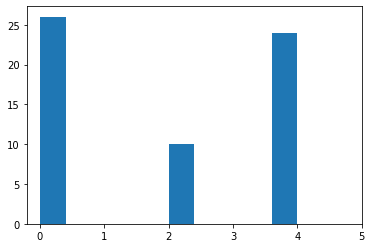

In [7]:
best_machine_index = []
for elem in res:
    best_machine_index.append(elem[1])
plt.hist(best_machine_index)
plt.xticks([0,1,2,3,4,5]);

In [27]:
x_train, y_train = zip(*training_data)
with open('x_train.csv', 'w') as FOUT:
    np.savetxt(FOUT, x_train)
with open('y_train.csv', 'w') as FOUT:
    np.savetxt(FOUT, y_train)

In [29]:
print(y_train)

(4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 0, 0, 0, 0, 0, 0, 2, 2, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4)


In [30]:
from numpy import genfromtxt
X_train = genfromtxt('x_train.csv')
y_train = genfromtxt('y_train.csv')

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(500, activation='relu', input_dim=43))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50)

ModuleNotFoundError: No module named 'tensorflow'

# TKET IonQ Custom Rebase Pass

In [1]:
import pytket
from pytket import OpType, circuit, _tket, Circuit
from pytket.passes import RebaseCustom

In [ ]:
gates = {OpType.Rz, OpType.Ry, OpType.CY, OpType.ZZPhase}
cx_in_cy = Circuit(2)
cx_in_cy.Rz(0.5, 1).CY(0, 1).Rz(-0.5, 1)
def tk1_to_rzry(a, b, c):
    circ = Circuit(1)
    circ.Rz(c + 0.5, 0).Ry(b, 0).Rz(a - 0.5, 0)
    return circ

custom = RebaseCustom(gates, cx_in_cy, tk1_to_rzry)

circ = Circuit(3)
circ.X(0).CX(0, 1).Ry(0.2, 1)
circ.add_gate(OpType.ZZPhase, -0.83, [2, 1]).Rx(0.6, 2)

custom.apply(circ)

print(circ.get_commands())

In [7]:
ionq_gateset = {OpType.Rz, OpType.Ry, OpType.XXPhase}
cx_in_ionq = _tket.circuit._library._CX_using_XXPhase_0()
def tk1_to_rzry(a, b, c):
    circ = Circuit(1)
    circ.Rz(c + 0.5, 0).Ry(b, 0).Rz(a - 0.5, 0)
    return circ
ionq_rebase = RebaseCustom(ionq_gateset, cx_in_ionq, tk1_to_rzry)

In [11]:
circ = Circuit(3)
circ.X(0).CX(0, 1).Ry(0.2, 1)
circ.add_gate(OpType.ZZPhase, -0.83, [2, 1]).Rx(0.6, 2)

ionq_rebase.apply(circ)
print(circ.get_commands())

[Rz(0.5) q[0];, Ry(0.5) q[2];, Ry(1) q[0];, Rz(3.5) q[0];, Ry(0.5) q[0];, XXPhase(0.5) q[0], q[1];, Ry(3.5) q[0];, Rz(0.5) q[1];, Rz(3.5) q[0];, Ry(3.5) q[1];, Rz(3.5) q[1];, Ry(0.2) q[1];, XXPhase(0.5) q[2], q[1];, Rz(0.5) q[1];, Ry(3.5) q[2];, Ry(3.5) q[1];, Rz(3.5) q[2];, Rz(3.5) q[1];, Ry(0.5) q[2];, Rz(3.17) q[1];, XXPhase(0.5) q[2], q[1];, Rz(0.5) q[1];, Ry(3.5) q[2];, Ry(3.5) q[1];, Rz(3.5) q[2];, Rz(3.5) q[1];, Rz(0.5) q[2];, Ry(0.6) q[2];, Rz(3.5) q[2];]


In [14]:
from pytket._tket.circuit._library._CX_using_XXPhase_0()

In [16]:
_library._CX_using_XXPhase_0()

[Ry(0.5) q[0]; XXPhase(0.5) q[0], q[1]; Ry(3.5) q[0]; Rx(3.5) q[1]; Rz(3.5) q[0]; ]